In [94]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [95]:
dataset=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
dataset.head(17)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [8]:
dataset.sample(12)
dataset.shape
dataset.columns
dataset.info()
dataset.describe()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [13]:
#Rename the necessary 

dataset.rename(columns={'iyear':'Saal','imonth':'Mahina','city':'Shahar','iday':'Din','country_txt':'Mulk','region_txt':'Jagah','attacktype1_txt':'Way','target1':'Lakshya','nkill':'Dead','nwound':'Injured','summary':'Saar','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Maksad'},inplace=True)
dataset['Casualities'] = dataset.Dead + dataset.Injured
dataset=dataset[['Saal','Mahina','Din','Mulk','Jagah','Shahar','latitude','longitude','Way','Dead','Injured','Casualities','Lakshya','Group','Target_type','Weapon_type']]
dataset.head(20)

,Saal,Mahina,Din,Mulk,Jagah,Shahar,latitude,longitude,Way,Dead,Injured,Casualities,Lakshya,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [14]:
dataset.sample(15)
dataset.shape
dataset.columns

Index(['Saal', 'Mahina', 'Din', 'Mulk', 'Jagah', 'Shahar', 'latitude',
       'longitude', 'Way', 'Dead', 'Injured', 'Casualities', 'Lakshya',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [15]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Saal         181691 non-null  int64  
 1   Mahina       181691 non-null  int64  
 2   Din          181691 non-null  int64  
 3   Mulk         181691 non-null  object 
 4   Jagah        181691 non-null  object 
 5   Shahar       181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   Way          181691 non-null  object 
 9   Dead         171378 non-null  float64
 10  Injured      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Lakshya      181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


,Saal,Mahina,Din,latitude,longitude,Dead,Injured,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Missing Data Status

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Saal         181691 non-null  int64  
 1   Mahina       181691 non-null  int64  
 2   Din          181691 non-null  int64  
 3   Mulk         181691 non-null  object 
 4   Jagah        181691 non-null  object 
 5   Shahar       181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   Way          181691 non-null  object 
 9   Dead         171378 non-null  float64
 10  Injured      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Lakshya      181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


In [19]:
dataset.describe()

,Saal,Mahina,Din,latitude,longitude,Dead,Injured,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [17]:
dataset.isnull().sum()

Saal               0
Mahina             0
Din                0
Mulk               0
Jagah              0
Shahar           434
latitude        4556
longitude       4557
Way                0
Dead           10313
Injured        16311
Casualities    16874
Lakshya          636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

# Renaming the Missing Ones.

In [21]:
dataset.dropna(axis=1, inplace=True)  #The dropna() method removes the rows that contains NULL values.
dataset.shape

(181691, 9)

In [22]:
dataset.isnull().sum()

Saal           0
Mahina         0
Din            0
Mulk           0
Jagah          0
Way            0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

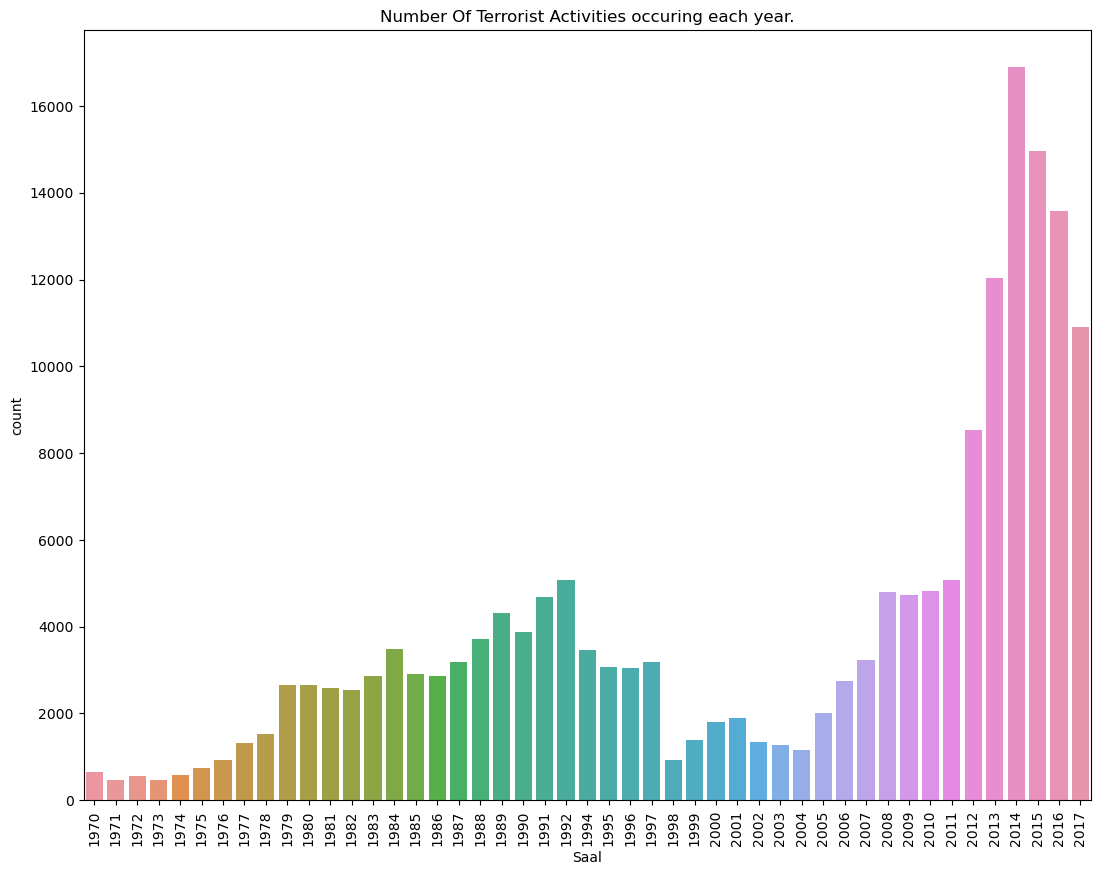

In [26]:
#Counting the Terrorist Attack

plt.figure(figsize=(13,10))
sb.countplot(x="Saal", data=dataset)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities occuring each year.')
plt.show()

In [28]:
## Observation
#From the graph we can see 2013-17 marks the highest terrorism activities with 2014 having the highest as we see.
#There has been a gradual increase in Terror Activities by 2004.
#Highest number of terror activities happened by the year 2014.
#After 2014 the terrorism started to decline.

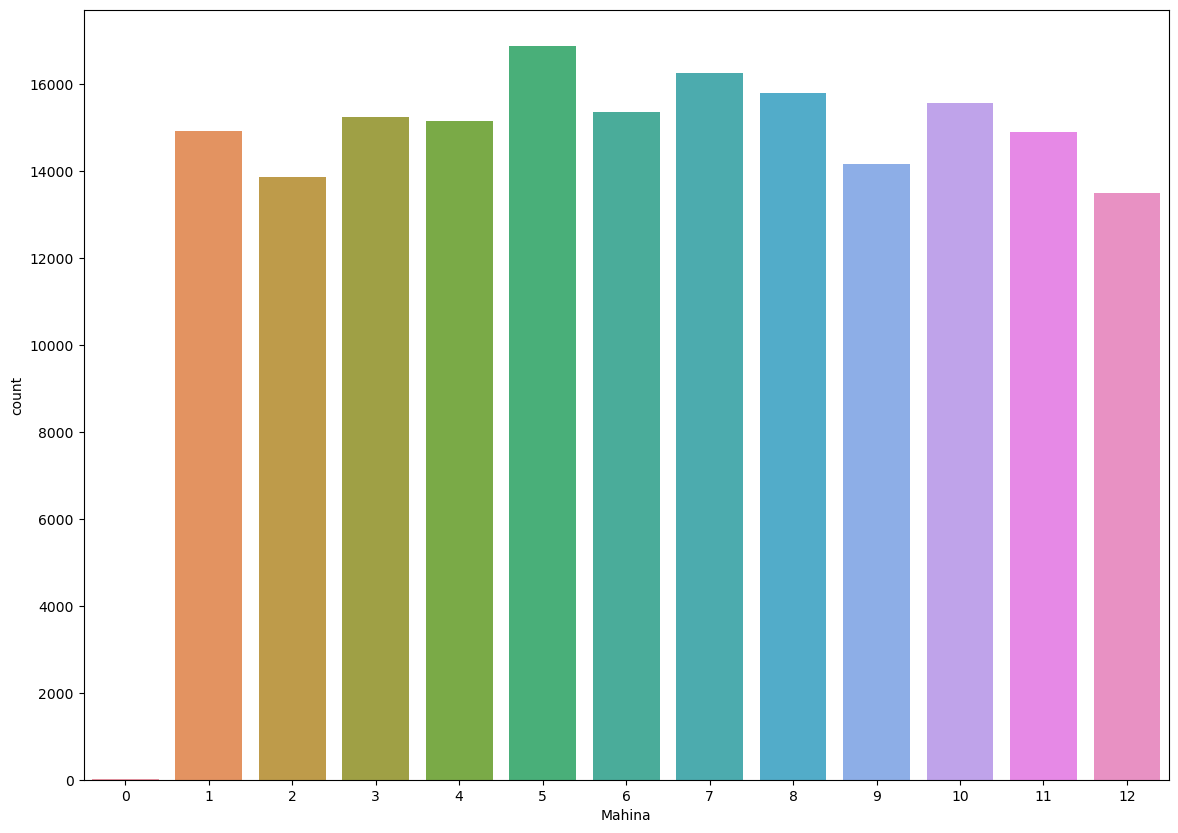

In [30]:
#month analysis

dataset['Mahina'].value_counts()
plt.figure(figsize = (14, 10))
sb.countplot(x='Mahina', data = dataset)
plt.xticks(rotation=0)
plt.show()

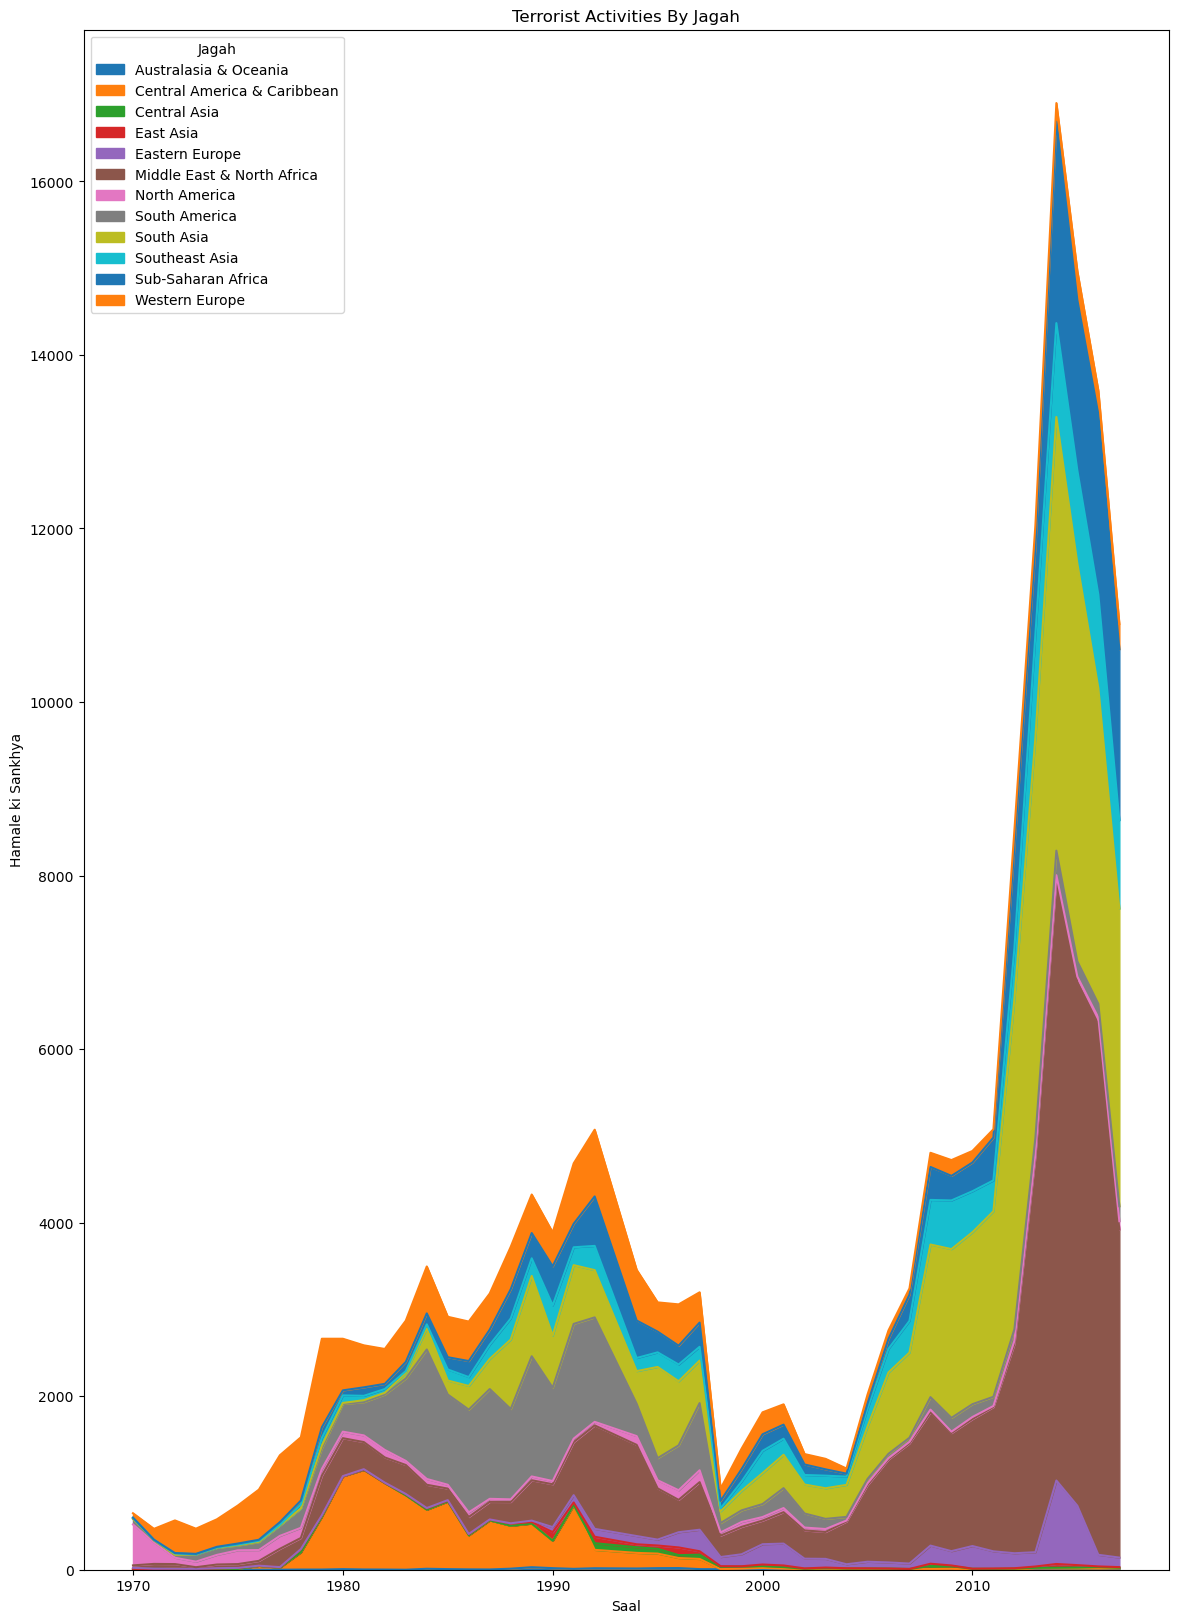

In [31]:
#Terrorist Activities By Jagah
pd.crosstab(dataset.Saal, dataset.Jagah).plot(kind='area',figsize=(14,20))
plt.title('Terrorist Activities By Jagah')
plt.ylabel('Hamale ki Sankhya')
plt.show()

In [34]:
for colname,colval in dataset.iteritems():
    print(colname,':',dataset[colname].nunique())

Saal : 47
Mahina : 13
Din : 32
Mulk : 205
Jagah : 12
Way : 9
Group : 3537
Target_type : 22
Weapon_type : 12


In [35]:
for colname,colval in dataset.iteritems():
    if dataset[colname].dtype==object and dataset[colname].nunique()<50:
        print(colname,':',dataset[colname].unique())

Jagah : ['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
Way : ['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
Target_type : ['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
Weapon_type : ['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include

In [37]:
dataset.isnull().sum()

Saal           0
Mahina         0
Din            0
Mulk           0
Jagah          0
Way            0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [42]:
dataset.duplicated().sum()

33254

In [43]:
dataset.drop_duplicates(keep='first',inplace=True)

In [44]:
dataset.isnull().sum()

Saal           0
Mahina         0
Din            0
Mulk           0
Jagah          0
Way            0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148437 entries, 0 to 181690
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Saal         148437 non-null  int64 
 1   Mahina       148437 non-null  int64 
 2   Din          148437 non-null  int64 
 3   Mulk         148437 non-null  object
 4   Jagah        148437 non-null  object
 5   Way          148437 non-null  object
 6   Group        148437 non-null  object
 7   Target_type  148437 non-null  object
 8   Weapon_type  148437 non-null  object
dtypes: int64(3), object(6)
memory usage: 11.3+ MB


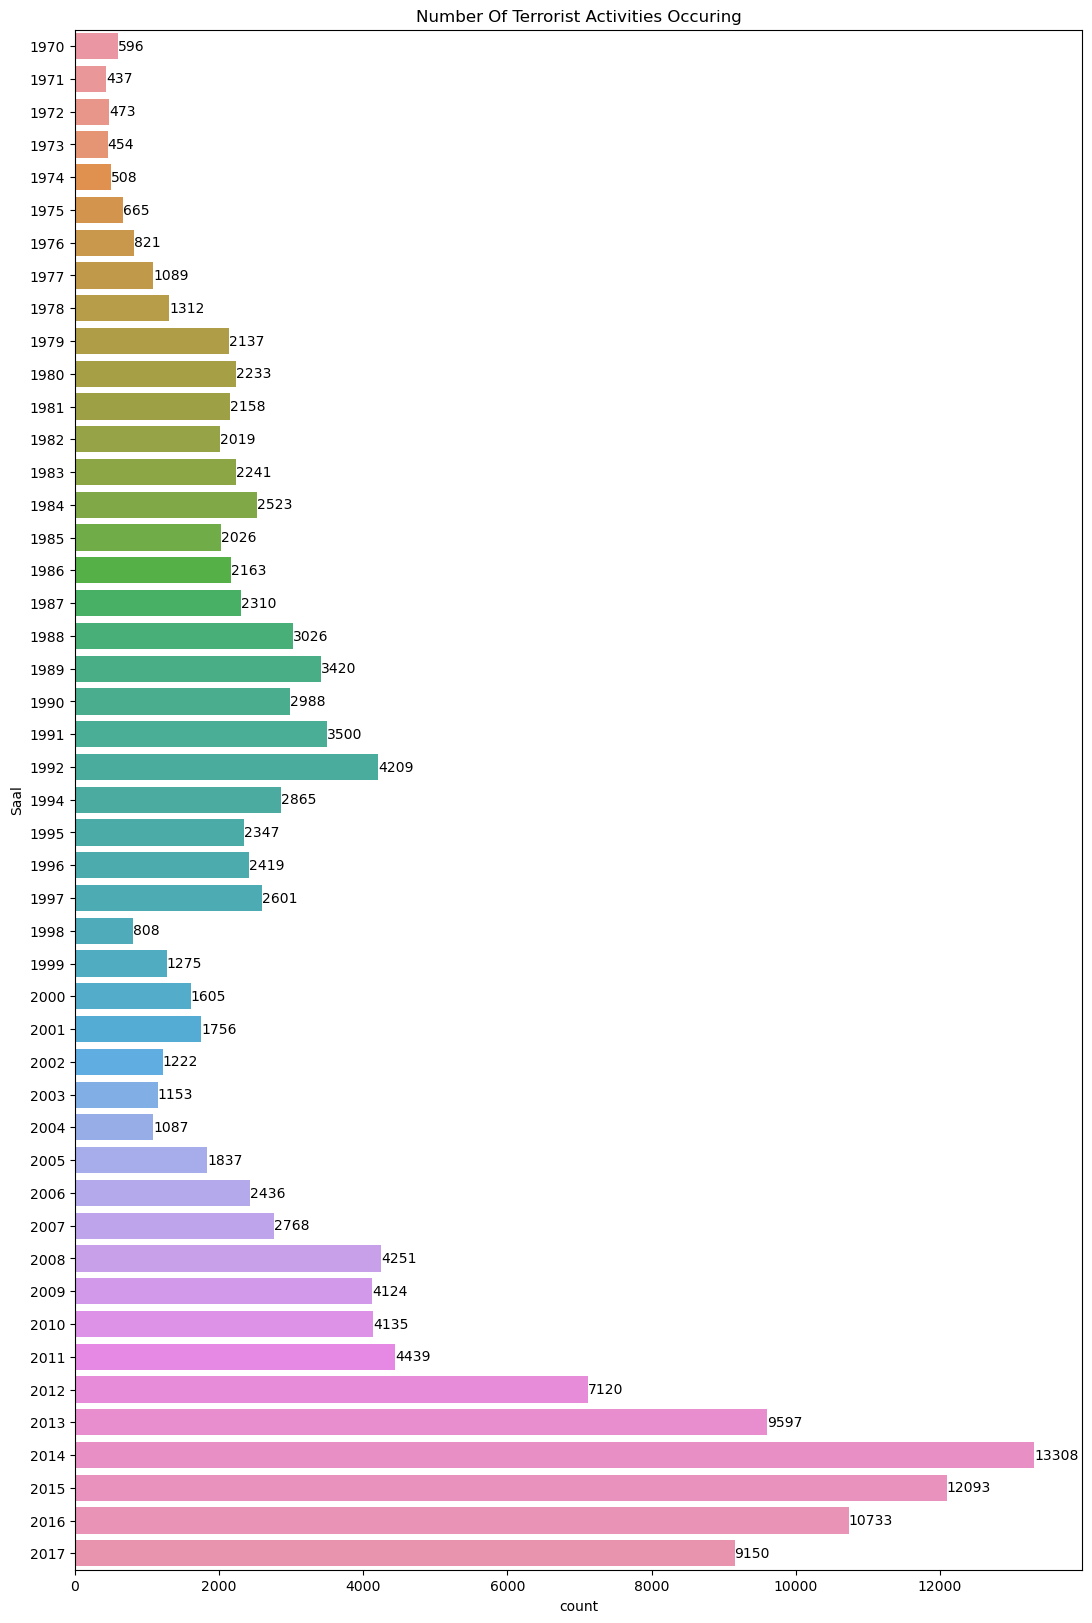

In [47]:
plt.figure(figsize=(13,20))
ax=sb.countplot(y=dataset['Saal'])
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('Number Of Terrorist Activities Occuring');

In [49]:
heat=dataset.pivot_table(index='Mulk',columns='Saal')
heat.fillna(0,inplace=True)

In [50]:
heat.describe()

Din                                                              \
Saal         1970        1971        1972        1973        1974        1975   
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     2.060182    2.421183    3.409469    2.992818    3.669099    2.716764   
std      5.371836    6.162199    7.396656    6.719033    7.704954    6.199876   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     29.000000   28.000000   28.000000   29.000000   31.000000   27.000000   

                                                       ...      Mahina  \
Saal         1976        1977        1978        1979  ...        2008   
count  205.000000  205.000000  205.000000  205.000000  ...  205.000000   
mean     3.666361    4.099398    4.375370    5.749412  ...    2.870200   
std      7.185288    7.737241    7.491836    8.102141  ...    3.569018   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      1.000000    1.000000   10.000000   13.962264  ...    6.000000   
max     30.000000   29.000000   31.000000   28.000000  ...   12.000000   

                                                                               \
Saal         2009        2010        2011        2012        2013        2014   
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     2.294268    2.364790    2.532374    2.560365    2.971100    3.129551   
std      3.140375    3.437925    3.661561    3.382189    3.609717    3.533182   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      5.152174    6.000000    5.583333    6.000000    6.250000    6.533210   
max     11.000000   11.800000   12.000000   12.000000   12.000000   12.000000   

                                           
Saal         2015        2016        2017  
count  205.000000  205.000000  205.000000  
mean     3.329325    3.411453    3.124505  
std      3.789214    3.580701    3.419425  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    2.000000    0.000000  
75%      6.750000    6.625000    6.282051  
max     12.000000   12.000000   12.000000  

[8 rows x 94 columns]

In [51]:
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, Afghanistan to Zimbabwe
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Din, 1970)     205 non-null    float64
 1   (Din, 1971)     205 non-null    float64
 2   (Din, 1972)     205 non-null    float64
 3   (Din, 1973)     205 non-null    float64
 4   (Din, 1974)     205 non-null    float64
 5   (Din, 1975)     205 non-null    float64
 6   (Din, 1976)     205 non-null    float64
 7   (Din, 1977)     205 non-null    float64
 8   (Din, 1978)     205 non-null    float64
 9   (Din, 1979)     205 non-null    float64
 10  (Din, 1980)     205 non-null    float64
 11  (Din, 1981)     205 non-null    float64
 12  (Din, 1982)     205 non-null    float64
 13  (Din, 1983)     205 non-null    float64
 14  (Din, 1984)     205 non-null    float64
 15  (Din, 1985)     205 non-null    float64
 16  (Din, 1986)     205 non-null    float64
 17  (Din, 1987)     205 non-n

In [52]:
heat.head(15)

Din                                             \
Saal                      1970       1971       1972      1973       1974   
Mulk                                                                        
Afghanistan           0.000000   0.000000   0.000000   1.00000   0.000000   
Albania               0.000000   0.000000   0.000000   0.00000   0.000000   
Algeria               0.000000   0.000000   6.000000   0.00000   0.000000   
Andorra               0.000000   0.000000   0.000000   0.00000  14.000000   
Angola                0.000000   0.000000   0.000000   0.00000   0.000000   
Antigua and Barbuda   0.000000   0.000000   0.000000   0.00000   0.000000   
Argentina            16.947368  24.571429  16.615385  15.87931  15.408163   
Armenia               0.000000   0.000000   0.000000   0.00000   0.000000   
Australia            21.000000  23.000000  18.750000   0.00000  24.000000   
Austria               0.000000   0.000000  18.000000  21.00000  17.000000   
Azerbaijan            0.000000   0.000000   0.000000   0.00000   0.000000   
Bahamas               0.000000   0.000000   0.000000   0.00000   0.000000   
Bahrain               0.000000   0.000000   0.000000   0.00000   0.000000   
Bangladesh            0.000000   0.000000   0.000000   0.00000   0.000000   
Barbados              0.000000   0.000000   0.000000   0.00000   0.000000   

                                                                   ...  \
Saal                      1975   1976  1977       1978       1979  ...   
Mulk                                                               ...   
Afghanistan           0.000000   0.00   0.0   0.000000  16.666667  ...   
Albania               0.000000   0.00   0.0   0.000000   0.000000  ...   
Algeria               0.000000   3.00   0.0   5.000000  28.000000  ...   
Andorra               0.000000   0.00   0.0   0.000000   0.000000  ...   
Angola                0.000000   0.00  20.0   0.000000   9.000000  ...   
Antigua and Barbuda   0.000000   0.00   0.0   0.000000   0.000000  ...   
Argentina            15.636364  14.00  14.8  13.714286  15.875000  ...   
Armenia               0.000000   0.00   0.0   0.000000   0.000000  ...   
Australia             0.000000   0.00   0.0  20.000000   2.000000  ...   
Austria              21.500000  15.25  13.4  18.000000  17.600000  ...   
Azerbaijan            0.000000   0.00   0.0   0.000000   0.000000  ...   
Bahamas               0.000000  12.00   0.0   0.000000   0.000000  ...   
Bahrain               0.000000   0.00   0.0   0.000000   5.000000  ...   
Bangladesh            0.000000   0.00   6.0   0.000000  27.000000  ...   
Barbados              0.000000   8.00   0.0   0.000000   0.000000  ...   

                       Mahina                                            \
Saal                     2008       2009      2010       2011      2012   
Mulk                                                                      
Afghanistan          6.298734   6.739407  6.651709   7.834606  6.297619   
Albania              0.000000   7.000000  0.000000   0.000000  0.000000   
Algeria              6.596154   6.519231  6.870000   6.200000  5.358974   
Andorra              0.000000   0.000000  0.000000   0.000000  0.000000   
Angola               0.000000   7.000000  6.000000   0.000000  0.000000   
Antigua and Barbuda  0.000000   0.000000  0.000000   0.000000  0.000000   
Argentina            0.000000   8.000000  8.000000  12.000000  5.000000   
Armenia              0.000000   2.000000  0.000000   0.000000  0.000000   
Australia            9.333333  10.000000  2.000000   0.000000  0.000000   
Austria              9.000000   4.666667  0.000000   1.000000  0.000000   
Azerbaijan           8.000000   4.000000  0.000000   0.000000  0.000000   
Bahamas              0.000000   0.000000  0.000000   0.000000  0.000000   
Bahrain              4.000000   0.000000  6.000000  12.000000  6.956522   
Bangladesh           7.052632   6.185185  4.454545   3.923077  6.555556   
Barbados             0.000000   